<a href="https://colab.research.google.com/github/ckgpeace/EIP4/blob/master/Assignment_3_attempt7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

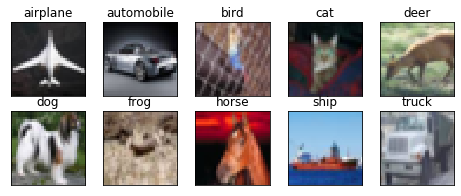

In [15]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# 7th Attempt

# Keeping adam as optimizer
# Changing the image augmentaion
# Changing model architecture
# Adding GAP

model=Sequential()
model.add(SeparableConv2D(32, kernel_size=(3, 3), padding='same',  activation='relu', input_shape=(32,32,3))) #32x32x32
model.add(SeparableConv2D(64, kernel_size=(3, 3), activation='relu')) #30x30x64
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))  #15x15x64

model.add(SeparableConv2D(128, kernel_size=(3, 3), padding='same',  activation='relu'))  #15x15x128
model.add(SeparableConv2D(256, kernel_size=(3, 3), activation='relu'))  #13x13x256
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #6x6x128


model.add(SeparableConv2D(10, kernel_size=(6, 6), activation='relu'))  #1x1x10

model.add(GlobalAveragePooling2D())

# model.add(Flatten())
model.add(Activation('softmax'))


# Compile the model
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(optimizer=Adam(lr=0.003),loss='categorical_crossentropy',metrics=['accuracy'])


In [27]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_28 (Separab (None, 32, 32, 32)        155       
_________________________________________________________________
separable_conv2d_29 (Separab (None, 30, 30, 64)        2400      
_________________________________________________________________
batch_normalization_12 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
separable_conv2d_30 (Separab (None, 15, 15, 128)       8896      
_________________________________________________________________
separable_conv2d_31 (Separab (None, 13, 13, 256)       34176     
_________________________________________________________________
batch_normalization_13 (Batc (None, 13, 13, 256)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 25s 64ms/step - loss: 1.2958 - acc: 0.5465 - val_loss: 1.5351 - val_acc: 0.5185
Epoch 2/50
390/390 [==============================] - 23s 59ms/step - loss: 0.8970 - acc: 0.6882 - val_loss: 1.4713 - val_acc: 0.5692
Epoch 3/50
390/390 [==============================] - 23s 59ms/step - loss: 0.7690 - acc: 0.7342 - val_loss: 1.2390 - val_acc: 0.6173
Epoch 4/50
390/390 [==============================] - 23s 59ms/step - loss: 0.6878 - acc: 0.7635 - val_loss: 1.1424 - val_acc: 0.6516
Epoch 5/50
390/390 [==============================] - 23s 60ms/step - loss: 0.6271 - acc: 0.7824 - val_loss: 1.1993 - val_acc: 0.6313
Epoch 6/50
390/390 [==============================] - 23s 60ms/step - loss: 0.5712 - acc: 0.8035 - val_loss: 1.2779 - val_acc: 0.6285
Epoch 7/50
390/390 [==============================] - 23s 60ms/step - loss: 0.5310 - acc: 0.8175 - val_loss: 1.0196 - val_acc: 0.6936
Epoch 8/50
390/390 [==============================] - 23s 60ms

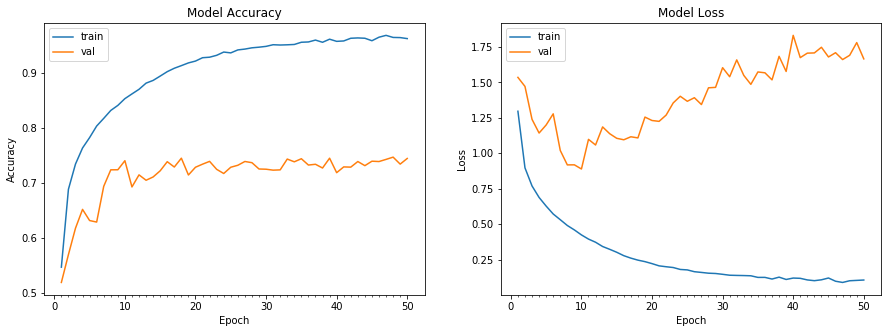

Accuracy on test data is: 74.44


In [28]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[LearningRateScheduler(scheduler, verbose=1))
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))